In [38]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
num_classes = 60

In [3]:
# Mount Google Drive to access files if necessary
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Path to your .h5 file in Google Drive
file_path1 = '/content/drive/My Drive/dataset1/NTU_CS.h5'
file_path2 = '/content/drive/My Drive/dataset1/NTU_CV.h5'


In [6]:
new_model1 = tf.keras.models.load_model('/content/drive/My Drive/dataset1/my_model1_cs.keras')

# Show the model architecture
new_model1.summary()

Model: "resnet50_with_attention"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 150, 1)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 150, 75, 64)          3200      ['input_2[0][0]']             
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 150, 75, 64)          256       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 activation_49 (Activation)  (None, 150, 75, 64)          0         ['bn_con

In [7]:
new_model2 = tf.keras.models.load_model('/content/drive/My Drive/dataset1/my_model_2_cs.keras')
# Show the model architecture
new_model2.summary()

Model: "efficientnet_with_attention"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 150, 1)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 150, 75, 64)          3200      ['input_2[0][0]']             
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 150, 75, 64)          256       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 activation_49 (Activation)  (None, 150, 75, 64)          0         ['bn

In [8]:
new_model3 = tf.keras.models.load_model('/content/drive/My Drive/dataset1/my_model_3_cs.keras')
# Show the model architecture
new_model3.summary()

Model: "densenet_with_attention"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 150, 1)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 150, 75, 64)          3200      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_10 (MaxPooli  (None, 74, 37, 64)           0         ['conv1[0][0]']               
 ng2D)                                                                                            
                                                                                                  
 bn2_a_branch2a (BatchNorma  (None, 74, 37, 64)           256       ['max_po

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense

# Define input shape
input_shape = (300, 150 ,1)  # Example input shape

# Create inputs
inputs = Input(shape=input_shape)

# Create individual models
#model1 = new_model1(input_shape, num_classes)
#model2 = new_model2(input_shape, num_classes)
#model3 = new_model3(input_shape, num_classes)

new_model1.trainable = False
new_model2.trainable = False
new_model3.trainable = False


# Get outputs from each model
output1 = new_model1(inputs)
output2 = new_model2(inputs)
output3 = new_model3(inputs)

# Concatenate outputs
combined_output = Concatenate()([output1, output2, output3])

# Additional layers if necessary
combined_output = Dense(1024, activation='relu')(combined_output)
combined_output = Dense(512, activation='relu')(combined_output)
combined_output = Dense(num_classes, activation='softmax')(combined_output)

# Create combined model
combined_model = Model(inputs=inputs, outputs=combined_output, name='combined_model')

# Compile the combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary of the combined model
combined_model.summary()


Model: "combined_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 300, 150, 1)]        0         []                            
                                                                                                  
 resnet50_with_attention (F  (None, 60)                   2286139   ['input_8[0][0]']             
 unctional)                                               6                                       
                                                                                                  
 efficientnet_with_attentio  (None, 60)                   2286139   ['input_8[0][0]']             
 n (Functional)                                           6                                       
                                                                                     

In [41]:
# Load the NTU CS and CV datasets from .h5 files
with h5py.File(file_path1, 'r') as cs_file, h5py.File(file_path2, 'r') as cv_file:
    # List all keys in the files
    print("Keys in CS file:", list(cs_file.keys()))
    print("Keys in CV file:", list(cv_file.keys()))


Keys in CS file: ['test_x', 'test_y', 'valid_x', 'valid_y', 'x', 'y']
Keys in CV file: ['test_x', 'test_y', 'valid_x', 'valid_y', 'x', 'y']


In [42]:
# Load the NTU CS and CV datasets from .h5 files
with h5py.File(file_path1, 'r') as cs_file, h5py.File(file_path2, 'r') as cv_file:
    # Access the datasets using the keys
    x_test_CS = np.array(cs_file['test_x'])
    y_test_CS = np.array(cs_file['test_y'])




In [43]:
with h5py.File(file_path1, 'r') as cs_file, h5py.File(file_path2, 'r') as cv_file:
    # Access the datasets using the keys
    x_train_CS = np.array(cs_file['test_x'])
    y_train_CS = np.array(cs_file['test_y'])


In [44]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have a `history` object_data=(x_valid_CS, y_valid_CS)
history = combined_model.fit(x_train_CS, y_train_CS, epochs=150, batch_size=32, validation_split=0.2)



Epoch 1/150
413/413 [==============================] - 54s 98ms/step - loss: 1.1336 - accuracy: 0.7507 - val_loss: 0.9785 - val_accuracy: 0.7620
Epoch 2/150
413/413 [==============================] - 36s 86ms/step - loss: 0.7950 - accuracy: 0.7860 - val_loss: 0.9551 - val_accuracy: 0.7608
Epoch 3/150
413/413 [==============================] - 36s 86ms/step - loss: 0.7270 - accuracy: 0.7957 - val_loss: 0.9636 - val_accuracy: 0.7641
Epoch 4/150
413/413 [==============================] - 36s 87ms/step - loss: 0.6758 - accuracy: 0.8044 - val_loss: 1.0240 - val_accuracy: 0.7538
Epoch 5/150
413/413 [==============================] - 36s 86ms/step - loss: 0.6335 - accuracy: 0.8170 - val_loss: 0.9959 - val_accuracy: 0.7626
Epoch 6/150
413/413 [==============================] - 36s 86ms/step - loss: 0.5912 - accuracy: 0.8255 - val_loss: 1.0378 - val_accuracy: 0.7498
Epoch 7/150
413/413 [==============================] - 36s 86ms/step - loss: 0.5484 - accuracy: 0.8374 - val_loss: 1.0925 - val_ac

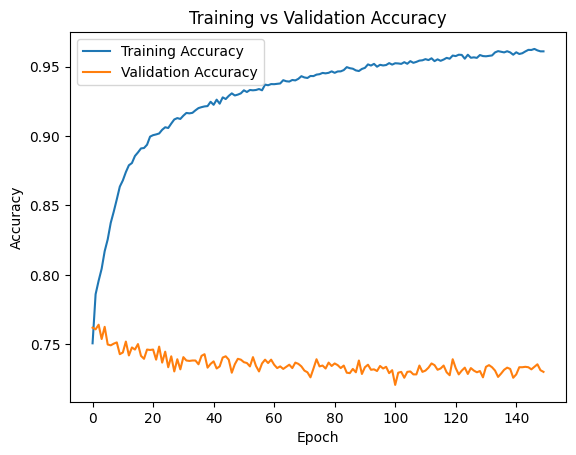

In [45]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

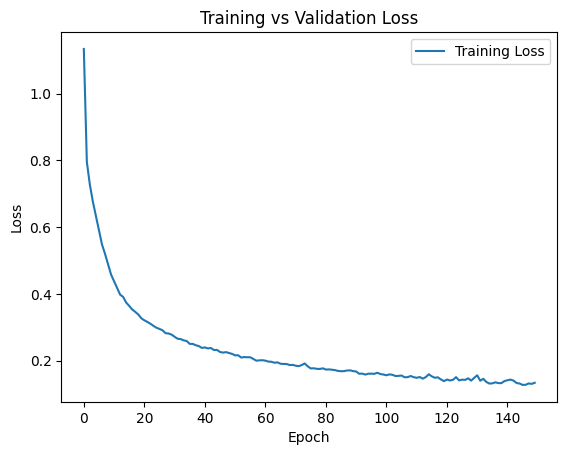

In [54]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [46]:
x_test_CS = np.reshape(x_test_CS, (16487, 300, 150, 1))

In [47]:
# Predict classes using the test data
predictions_CS = combined_model.predict(x_test_CS)
predicted_classes_CS = np.argmax(predictions_CS, axis=1)


516/516 [==============================] - 37s 64ms/step


In [48]:
# True classes
true_classes_CS = np.argmax(y_test_CS, axis=1)

In [49]:
# Compare predicted classes with true classes and calculate accuracy
accuracy_CS = np.mean(predicted_classes_CS == true_classes_CS)
print("Accuracy (CS):", accuracy_CS)

Accuracy (CS): 0.9190271122702736


In [53]:
# Print some of the predicted and true classes
print("Predicted Classes (CS):", predicted_classes_CS[:100])
print("True Classes (CS):", true_classes_CS[:100])

Predicted Classes (CS): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 47 41 42 43 44 45 46 40
 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39]
True Classes (CS): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39]


In [51]:
combined_model.save('/content/drive/My Drive/dataset1/combined_model_final1.keras')